
========== CLEANED DATA (FIRST 10 ROWS) ==========

    Transaction ID       Date Customer ID   Gender  Age Product Category  \
0                1 2023-11-24     CUST001     Male   34           Beauty   
1                2 2023-02-27     CUST002   Female   26         Clothing   
5                6 2023-04-25     CUST006   Female   45           Beauty   
7                8 2023-02-22     CUST008     Male   30      Electronics   
8                9 2023-12-13     CUST009  Unknown   63      Electronics   
9               10 2023-10-07     CUST010   Female   52         Clothing   
10              11 2023-02-14     CUST011     Male   23         Clothing   
11              12 2023-10-30     CUST012     Male   35           Beauty   
12              13 2023-08-05     CUST013     Male   22      Electronics   
13              14 2023-01-17     CUST014     Male   64         Clothing   

    Quantity  Price per Unit  Total Amount  
0        3.0            50.0         150.0  
1        2.0        

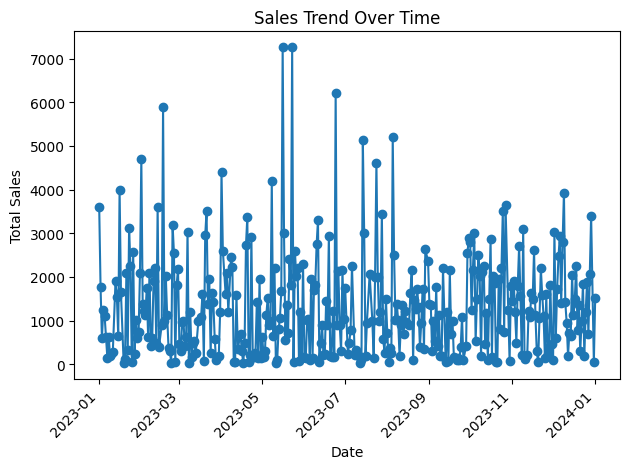


Showing Sales Per Product Category Bar Graph...


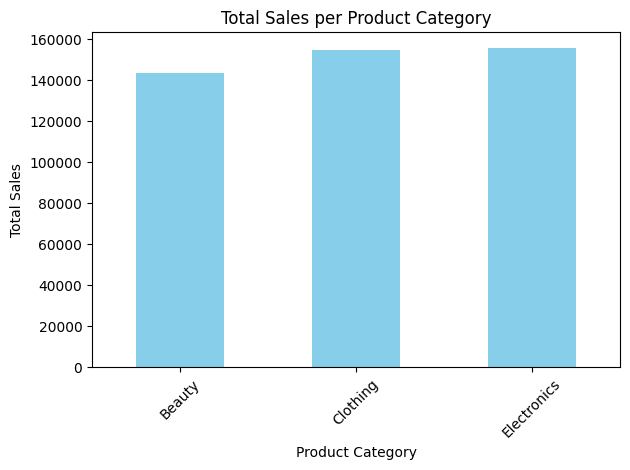


Showing Heatmap...


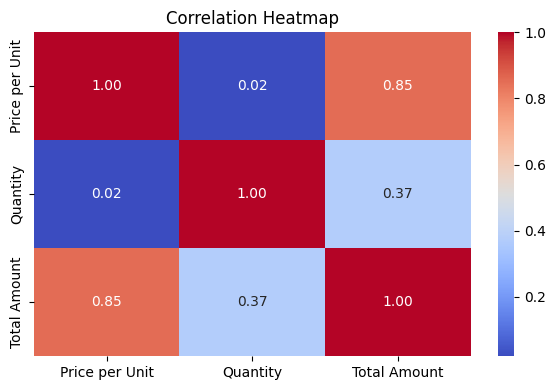

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

class RetailSalesAnalyzer:

    def __init__(self):
        # Load dataset
        self.data = pd.read_csv("retail_sales_dataset.csv")
        self.data['Date'] = pd.to_datetime(self.data['Date'])

    def clean(self):
        # Fill missing Price per Unit
        self.data['Price per Unit'] = self.data['Price per Unit'].fillna(
            self.data['Total Amount'] / self.data['Quantity']
        )

        # Fill missing Total Amount
        self.data['Total Amount'] = self.data['Total Amount'].fillna(
            self.data['Price per Unit'] * self.data['Quantity']
        )

        # Fill missing Quantity
        self.data['Quantity'] = self.data['Quantity'].fillna(
            self.data['Total Amount'] / self.data['Price per Unit']
        )

        # Fill missing Gender
        self.data['Gender'] = self.data['Gender'].fillna("Unknown")

        # Drop remaining NaN
        self.data.dropna(inplace=True)


    # METRICS

    def total_sales_per_product(self):
        return self.data.groupby("Product Category")["Total Amount"].sum()

    def best_selling_product(self):
        return self.total_sales_per_product().idxmax()

    def average_daily_sales(self):
        daily_sales = self.data.groupby(self.data["Date"].dt.date)["Total Amount"].sum()
        return int(np.ceil(daily_sales.mean()))   # using numpy, not math

    # VISUALIZATION 1

    def plot_sales_trend(self):
        trend = self.data.groupby("Date")["Total Amount"].sum()
        trend.plot(kind="line", marker="o")
        plt.title("Sales Trend Over Time")
        plt.xlabel("Date")
        plt.ylabel("Total Sales")
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

    # VISUALIZATION 2

    def plot_sales_per_product(self):
        sales = self.total_sales_per_product()
        sales.plot(kind='bar', color='skyblue')
        plt.title("Total Sales per Product Category")
        plt.xlabel("Product Category")
        plt.ylabel("Total Sales")
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

    # VISUALIZATION 3

    def plot_heatmap(self):
        plt.figure(figsize=(6, 4))
        corr = self.data[['Price per Unit', 'Quantity', 'Total Amount']].corr()
        sns.heatmap(corr,annot=True,cmap="coolwarm",fmt=".2f")
        plt.title("Correlation Heatmap")
        plt.tight_layout()
        plt.show()


# RUN

analyzer = RetailSalesAnalyzer()
analyzer.clean()

print("\n========== CLEANED DATA (FIRST 10 ROWS) ==========\n")
print(analyzer.data.head(10))

print("\n========== TOTAL SALES PER PRODUCT CATEGORY ==========\n")
print(analyzer.total_sales_per_product())

print("\n========== BEST SELLING CATEGORY ==========\n")
print(analyzer.best_selling_product())

print("\n========== AVERAGE DAILY SALES ==========\n")
print(analyzer.average_daily_sales())

# Visualizations
print("\nShowing Sales Trend Line Graph...")
analyzer.plot_sales_trend()

print("\nShowing Sales Per Product Category Bar Graph...")
analyzer.plot_sales_per_product()

print("\nShowing Heatmap...")
analyzer.plot_heatmap()
